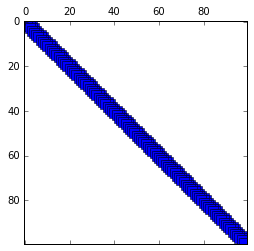

[  1.56296551+0.j   4.68851472+0.j   7.81291859+0.j  10.93541388+0.j
  14.05523779+0.j  17.17162820+0.j]


/home/grayzaghnal/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


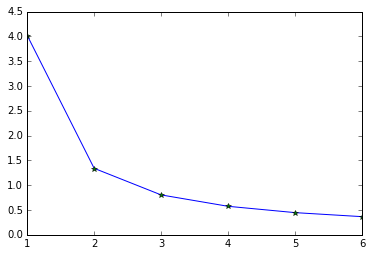

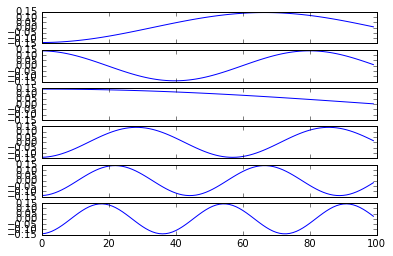

In [13]:

%matplotlib inline
import numpy as np
import scipy as sp 
import scipy.sparse.linalg as ssl
import matplotlib.pyplot as plt

n=100 # number of grid nodes
dx=1/n # discretization step, domain size = 1

c = np.ones((1,n))/dx # column-vector to construct 1d differential operator
F = sp.sparse.spdiags(np.vstack((-c, c)), np.array([0, 1]), n, n) # forward difference matrix

B = -sp.sparse.dia_matrix.transpose(F) # backward difference matrix


q = -B*F # to assemble eigenmatrix


plt.spy(sp.sparse.csr_matrix(q)) # to visualize matrix
plt.show()

kt = 2*sp.pi*1 # wave vector target to find resonance wavelength
k2, V = ssl.eigs(q, k=6, M=None, sigma=kt**2) 

k = np.sort(np.sqrt(k2)); # resonance wave vector 

print(k)

lam = 2*sp.pi/np.real(k); # wavelength
#Q = np.real(k)/(2*np.imag(k)); # quality factor

plt.hold(True)
plt.plot(np.arange(1,6.1,1), lam, '-')
plt.plot(np.arange(1,6.1,1), 4/(2*np.arange(0,5.1,1)+1), '*')

f, ax = plt.subplots(6,1, sharex=True, sharey=True)
for nOfInd in range(6):
    ax[nOfInd].plot(V[:,nOfInd],'-')

/home/grayzaghnal/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


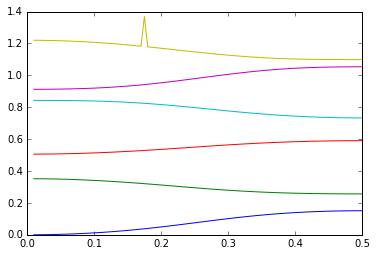

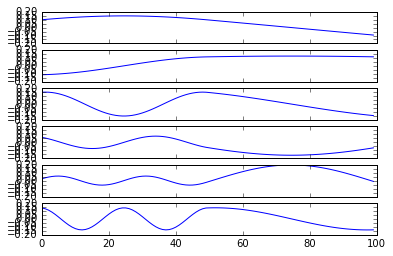

In [6]:

%matplotlib inline
import numpy as np
import scipy as sp 
import scipy.sparse.linalg as ssl
import matplotlib.pyplot as plt

n=100 # number of grid nodes
dx=1/n # discretization step, domain size = 1
eps1 = 13 # two layers of equal size forming band gap
eps2 = 1 # two layers of equal size forming band gap
kk0 = 2*sp.pi*np.arange(0.01,0.501,0.005) # k-vector in medium with eps1-eps2

c = np.ones((1,n))/dx # column-vector to construct 1d differential operator
F = sp.sparse.spdiags(np.vstack((-c, c)), np.array([0, 1]), n, n) # forward difference matrix
F = sp.sparse.lil_matrix(F) # change from diagonal type to csr to accsess single elements in sparse matrix

epscol = np.ones((1,n/2))/eps1 
epscol=np.append(epscol,np.ones((1,n/2))/eps2) # column-vector to construct 1/eps array
epsinv = sp.sparse.spdiags(epscol, 0, n, n) # to arrange diagonal matrix for 1/eps
k = np.zeros((6, kk0.size), dtype=complex)

for ik in range(kk0.size):
    k0=kk0[ik]
     
    F[n-1,0] = np.cos(k0*1)/dx # to impose periodic boundary conditions    
    B = -sp.sparse.lil_matrix.transpose(F) # backward difference matrix

    q = -epsinv*B*F # to assemble eigenmatrix

    kt = k0/np.sqrt((eps1+eps2)/2); # target k=w/c
    k2, V = ssl.eigs(q, k=6, M=None, sigma=kt**2)
    
    k[:,ik] = np.sqrt(k2) # k=w/c

lam = 2*sp.pi/np.real(k)
#Q = np.real(k)/(2*np.imag(k))
    
for nOfInd in range(6):
    plt.hold(True)
    plt.plot(kk0/(2*sp.pi), k[nOfInd,:]/(2*sp.pi) ,'-')

f, ax = plt.subplots(6,1, sharex=True, sharey=True)

for nOfInd in range(6):
    ax[nOfInd].plot(V[:,nOfInd],'-');

    